In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [66]:
def preprocess(df):
    df = df.dropna()
    feature_cols = ['Year', 'Crop', 'Precipitation', 'Temperature_avg', 'Temperature_max', 'Pesticide', 'Fertilizer']
    X = df[feature_cols].copy(deep=True)
    y = df['Yield'].copy(deep=True)
    # label encoding
    le = LabelEncoder()
    X['Crop'] = le.fit_transform(X['Crop'])
    # scaling
    scaling_cols = ['Precipitation', 'Temperature_avg', 'Temperature_max', 'Pesticide', 'Fertilizer']
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X)
    # X = scaler.fit_transform(X[scaling_cols])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
    return X_train, X_test, y_train, y_test, X
    

In [62]:
df = pd.read_csv("./Training_Data.csv")

In [65]:
df

,Crop,Year,Yield,Fertilizer,Pesticide,Precipitation,Temperature_avg,Temperature_max
0,Avocados,1990,88709,1798400.00,26624.98,821.09,20.96,28.43
1,Avocados,1991,94108,1619400.00,26624.98,754.55,20.90,28.45
2,Avocados,1992,82795,1616000.00,26624.98,779.30,20.68,28.04
3,Avocados,1993,85672,1591900.00,26624.98,773.06,20.96,28.55
4,Avocados,1994,89132,1647900.00,26624.98,657.44,21.38,29.02
...,...,...,...,...,...,...,...,...
119,Wheat,2016,53388,2186326.67,47421.33,801.73,21.75,29.36
120,Wheat,2017,52967,2139573.61,50801.94,795.08,22.03,29.75
121,Wheat,2018,54373,2140490.90,53144.44,783.02,21.66,29.18
122,Wheat,2019,55308,2086911.73,48989.20,721.02,21.88,29.46


In [67]:
x_train, x_test, y_train, y_test, x_scaled = preprocess(df)

In [49]:
x_scaled.shape

(543, 5)

In [68]:
pd.DataFrame(x_scaled).corr()

,0,1,2,3,4,5,6
0,1.000000e+00,-1.074409e-17,1.262250e-01,7.319379e-01,6.562071e-01,7.668011e-01,6.548688e-01
1,-1.074409e-17,1.000000e+00,4.297638e-17,-3.223228e-17,-1.325105e-16,6.267388e-18,1.432546e-17
2,1.262250e-01,4.297638e-17,1.000000e+00,-2.597006e-01,-3.058083e-01,1.188437e-01,8.152629e-02
3,7.319379e-01,-3.223228e-17,-2.597006e-01,1.000000e+00,9.528096e-01,5.075842e-01,6.270734e-01
4,6.562071e-01,-1.325105e-16,-3.058083e-01,9.528096e-01,1.000000e+00,5.063225e-01,5.549260e-01
5,7.668011e-01,6.267388e-18,1.188437e-01,5.075842e-01,5.063225e-01,1.000000e+00,4.627655e-01
6,6.548688e-01,1.432546e-17,8.152629e-02,6.270734e-01,5.549260e-01,4.627655e-01,1.000000e+00


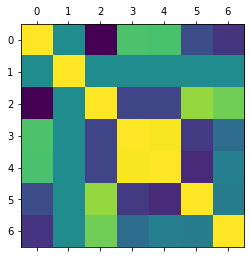

In [58]:
import matplotlib.pyplot as plt
plt.matshow(pd.DataFrame(x_scaled).corr())
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import math

In [70]:
model_lin = LinearRegression()
model_lin.fit(x_train, y_train)
y_pred_linear= model_lin.predict(x_test)

In [71]:
mae = metrics.mean_absolute_error(y_test, y_pred_linear)
mse = metrics.mean_squared_error(y_test, y_pred_linear)
rmse = math.sqrt(mse) 
r2 = metrics.r2_score(y_test, y_pred_linear)
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R2 : ",r2)

MAE :  23901.41554018083
MSE :  752838533.2973082
RMSE :  27437.903223411737
R2 :  0.4315909533288216
